# ISyE7406 Homework2

## Problem1

### (a) Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [492]:
df = pd.read_csv("http://www.isye.gatech.edu/~ymei/7406/Handouts/fat.csv", sep = ",", header = None)

In [493]:
df.rename(columns = df.iloc[0], inplace = True)

A data frame with 252 observations on the following 18 variables. [The detail is availbe on page 37](https://cran.r-project.org/web/packages/faraway/faraway.pdf)
* brozek: Percent body fat using Brozek’s equation, 457/Density - 414.2 
* siri: Percent body fat using Siri’s equation, 495/Density - 450 density Density (gm/$cm^3$)
* age: Age (yrs)
* weight: Weight (lbs)
* height: Height (inches)
* adipos: Adiposity index = Weight/Height$^2$ (kg/$m^2$)
* free: Fat Free Weight = (1 - fraction of body fat) * Weight, using Brozek’s formula (lbs) 
* neck: Neck circumference (cm)
* chest: Chest circumference (cm)
* abdom: Abdomen circumference (cm) at the umbilicus and level with the iliac crest
* hip: Hip circumference (cm)
* thigh: Thigh circumference (cm)
* knee: Knee circumference (cm)
* ankle: Ankle circumference (cm)
* biceps: Extended biceps circumference (cm)
* forearm: Forearm circumference (cm)
* wrist: Wrist circumference (cm) distal to the styloid processes

In [494]:
updateddf = df.drop(df.index[0]).astype(float)

### (b) Split Dataset
Now we want to train our models, so we will split the dataset into testing examples and training examples.
We will randomly select $30\%$ of data as our testing sample.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = updateddf.drop(['brozek'], axis = 1)
y = updateddf["brozek"]

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

### (c) Data Exploration
This step is to know mote about our traning data.

In [289]:
X_train.columns

Index(['siri', 'density', 'age', 'weight', 'height', 'adipos', 'free', 'neck',
       'chest', 'abdom', 'hip', 'thigh', 'knee', 'ankle', 'biceps', 'forearm',
       'wrist'],
      dtype='object')

In [290]:
interested_columns = ['neck','chest',
                      'abdom', 'hip', 'thigh', 'knee', 
                      'ankle', 'biceps', 'forearm','wrist']

In [291]:
X_train[interested_columns].describe()

,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,37.990909,100.917045,92.928977,99.975000,59.354545,38.622159,23.041477,32.169318,28.645455,18.231250
std,2.393713,8.541084,10.704072,6.984288,5.164835,2.438950,1.585339,2.994504,2.036547,0.939234
min,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.700000,24.800000,21.000000,15.800000
25%,36.400000,94.000000,85.025000,95.475000,56.000000,37.275000,22.000000,30.100000,27.300000,17.600000
50%,38.000000,99.900000,91.550000,99.300000,59.100000,38.500000,22.800000,32.000000,28.800000,18.300000
75%,39.650000,106.100000,100.025000,103.950000,62.150000,40.000000,24.000000,34.325000,29.925000,18.800000
max,43.900000,128.300000,126.200000,125.600000,74.400000,46.000000,33.700000,39.100000,33.800000,21.400000


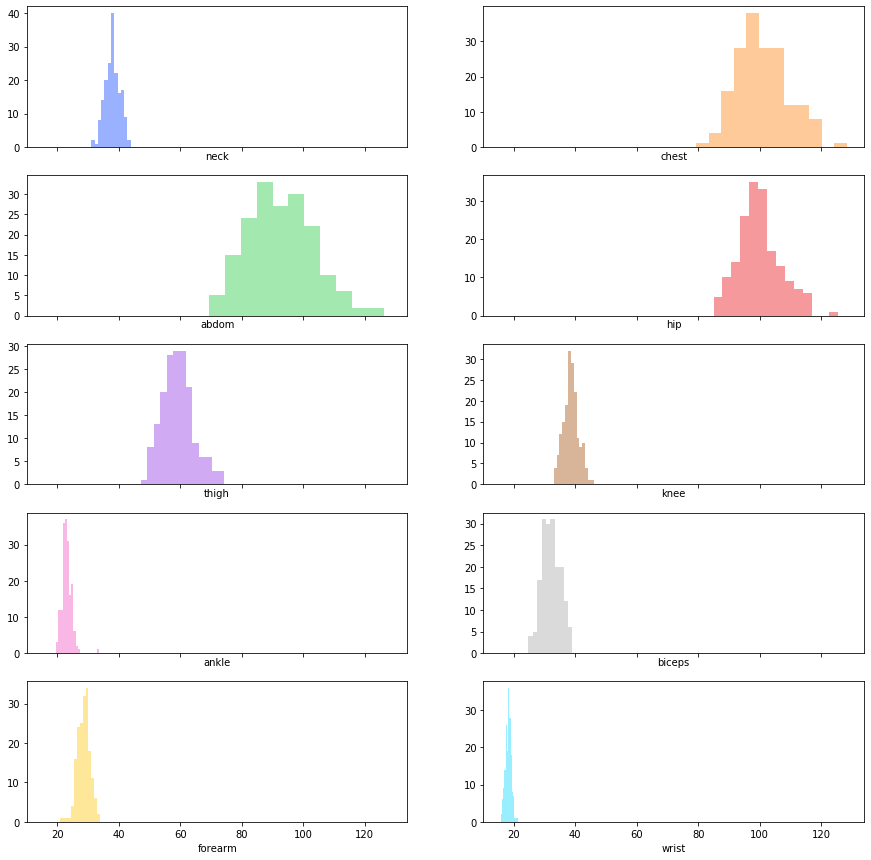

In [495]:
f, axes = plt.subplots(5, 2, figsize=(15, 15), sharex=True)
bright=["#023EFF", "#FF7C00", "#1AC938", "#E8000B", "#8B2BE2", "#9F4800", "#F14CC1",
        "#A3A3A3", "#FFC400", "#00D7FF", "#023EFF", "#1AC938", "#E8000B", "#8B2BE2", 
        "#FFC400", "#00D7FF"]
count = 0
row = 0
interested_columns = ['neck','chest',
                      'abdom', 'hip', 'thigh', 'knee', 
                      'ankle', 'biceps', 'forearm','wrist']
for i in range(10):
    sns.distplot(X_train.loc[:,interested_columns[i]], color = bright[i], ax = axes[row, (i + 2) % 2], kde =False)
    count += 1
    if (count == 2):
        count = 0
        row += 1
 

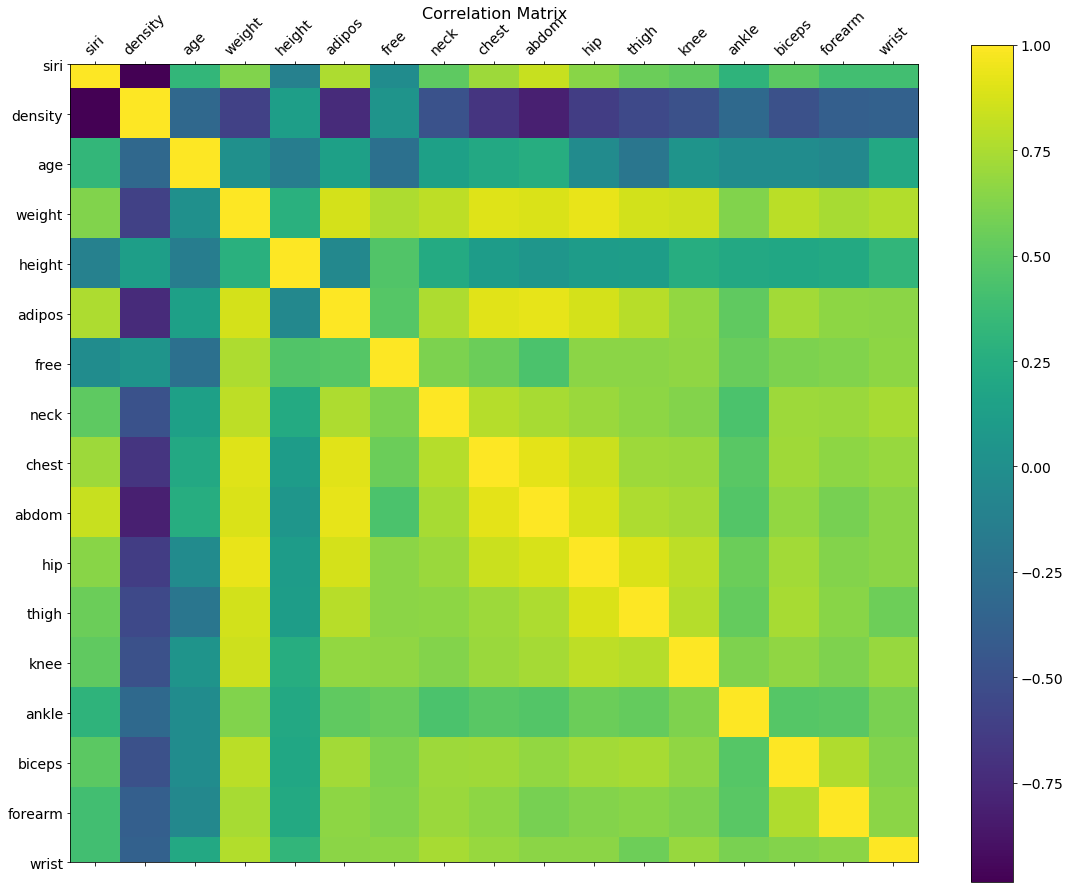

In [233]:
f = plt.figure(figsize=(19, 15))
plt.matshow(X_train.corr(), fignum=f.number)
plt.xticks(range(X_train.shape[1]), X_train.columns, fontsize=14, rotation=45)
plt.yticks(range(X_train.shape[1]), X_train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

### (d) Model Formulation
We will build the following models based on our training data.
1. Linear regression with all predictors.
2. Linear regression with the best subset of k = 5 predictors variables;
3. Linear regression with variables (stepwise) selected using AIC; 
4. Ridge regression;
5. LASSO;
6. Principal component regression;
7. Partial least squares.

#### (1) Linear regression with all predictors

In [143]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [144]:
reg.coef_

array([ 8.823e-01, -1.005e+01, -8.959e-04,  1.063e-02, -9.611e-04,
       -2.011e-02, -1.406e-02,  8.665e-04,  7.161e-03, -3.645e-04,
       -9.821e-03,  2.653e-02, -2.472e-02,  6.561e-03, -2.112e-02,
        2.108e-02,  5.516e-02])

In [145]:
y_predict = reg.predict(X_test)

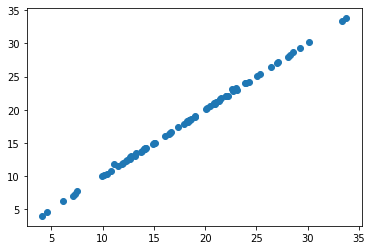

In [146]:
plt.scatter(y_test , y_predict)

In [147]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_predict))

MSE: 0.017203288325446306


In [496]:
#Since sklearn package does not have summary report like R,
#we import statsmodels package to get summary of the model
import statsmodels.api as sm
model_all = sm.OLS(y_train, sm.add_constant(X_train))
results = model_all.fit()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [307]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.round(1)

,features,VIF Factor
0,siri,246.8
1,density,3744.1
2,age,31.3
3,weight,4754.3
4,height,619.7
5,adipos,921.5
6,free,3943.0
7,neck,1027.6
8,chest,1749.0
9,abdom,1644.8


##### Monte Carlo Cross-Validation algorithm

In [148]:
from sklearn.model_selection import ShuffleSplit

def MonteCarloLM(data, y):
    mse = []
    rs = ShuffleSplit(n_splits = 100, test_size= .30, random_state=0)
    for train_index, test_index in rs.split(data):
        reg = LinearRegression().fit(data.iloc[train_index], y.iloc[train_index])
        y_predict = reg.predict(data.iloc[test_index])
        m = metrics.mean_squared_error(y.iloc[test_index], y_predict)
        mse.append(m)
    return mse

MonteCarloLM(X, y)
mean_mse = np.asarray(MonteCarloLM(X, y)).mean()
mean_mse
varRes = sum([(xi - mean_mse)**2 for xi in MonteCarloLM(X, y)]) / (np.asarray(MonteCarloLM(X, y)).size - 1)
varRes
print("Mean of MSE: ", mean_mse)
print("Variance of MSE: ", varRes)

Mean of MSE:  0.056954935750344396
Variance of MSE:  0.002364554877274568


#### (2) Linear regression with the best subset of k = 5 predictors variables

In [523]:
# ```{r code}
# library(leaps)
# models <- regsubsets(brozek~., data = fat, nvmax = 5)
# summary(models)
# ```

<img src="files/bestsubset.png">

In [345]:
X_train_5 = X_train.loc[:,["siri", "density", "thigh", "knee", "wrist"]]

In [346]:
from sklearn.linear_model import LinearRegression
reg_5 = LinearRegression().fit(X_train_5, y_train)

In [347]:
X_test_5 = X_test[["siri", "density", "thigh", "knee", "wrist"]]

In [348]:
y_predict_5 = reg_5.predict(X_test_5)

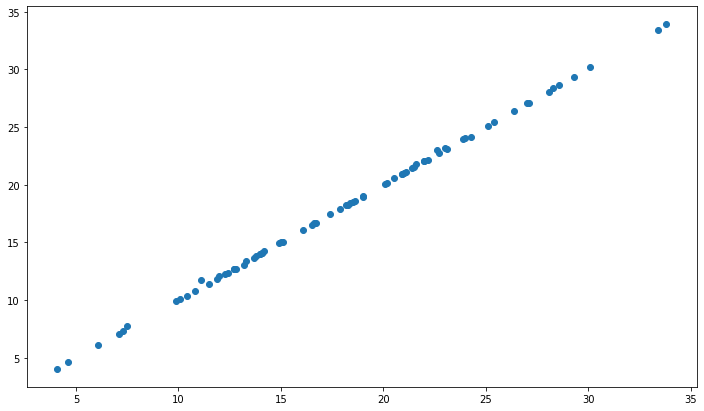

In [349]:
plt.scatter(y_test , y_predict_5)

In [350]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_predict_5))

MSE: 0.012543780156631393


In [497]:
model_5 = sm.OLS(y_train, sm.add_constant(X_train_5))
results_5 = model_5.fit()

In [353]:
#vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_5 = pd.DataFrame()
vif_5["features"] = X_train_5.columns
vif_5["VIF Factor"] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif_5.round(1)

,features,VIF Factor
0,siri,11.7
1,density,419.7
2,thigh,373.8
3,knee,862.9
4,wrist,740.2


##### Monte Carlo Cross-Validation algorithm

In [354]:
X_5 = X[["siri", "density", "thigh", "knee", "wrist"]] 
def MonteCarlo_5(data, y):
    mse = []
    rs = ShuffleSplit(n_splits = 100, test_size= .30, random_state=0)
    for train_index, test_index in rs.split(data):
        reg = LinearRegression().fit(data.iloc[train_index], y.iloc[train_index])
        y_predict = reg.predict(data.iloc[test_index])
        m = metrics.mean_squared_error(y.iloc[test_index], y_predict)
        mse.append(m)
    return mse

MonteCarlo_5(X_5, y)
mean_mse_5 = np.asarray(MonteCarlo_5(X_5, y)).mean()
mean_mse_5
varRes_5 = sum([(xi - mean_mse_5)**2 for xi in MonteCarlo_5(X_5, y)]) / (np.asarray(MonteCarlo_5(X_5, y)).size - 1)
varRes_5
print("Mean of MSE: ", mean_mse_5)
print("Variance of MSE: ", varRes_5)

Mean of MSE:  0.03959030028777379
Variance of MSE:  0.0010734174658907293


#### (3) Linear regression with variables (stepwise) selected using AIC;

In [29]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

def forward_selected(X_train, y_train):
    """Linear model designed by forward selection based on AIC.

    Parameters:
    -----------
    X_train : pandas DataFrame with all possible predictors
    y_train: response varaible
    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept selected by forward selection
           evaluated by AIC
    """
    selected = []
    remaining = set(X_train.columns)
    current_score = 0.0
    best_new_score = 0.0
    while len(remaining) > 0:
        scores_with_candidates = []
        for candidate in remaining:
            score = OLS(y_train, add_constant(X_train[selected + [candidate]])).fit().aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0][0], scores_with_candidates[0][1]
        if current_score > best_new_score:
            selected.append(best_candidate)
            remaining.remove(best_candidate)
            current_score = best_new_score
        else:
            remaining.remove(best_candidate)
    model = OLS(y_train, add_constant(X_train[selected])).fit()
    print("Columns: ", selected)
    print("AIC: ", model.aic)
    return model

In [30]:
reg_AIC = forward_selected(X_train, y_train)

Columns:  ['siri', 'density', 'thigh', 'knee', 'wrist', 'biceps', 'forearm', 'hip']
AIC:  -77.08134119243368


In [35]:
from sklearn.linear_model import LinearRegression
reg_sklearn_aic = LinearRegression().fit(X_train[['siri', 'density', 'thigh', 'knee', 'wrist', 'biceps', 'forearm', 'hip']], 
                                         y_train)

In [38]:
y_predict_aic = reg_sklearn_aic.predict(X_test[['siri', 'density', 'thigh', 'knee', 'wrist', 'biceps', 'forearm', 'hip']])

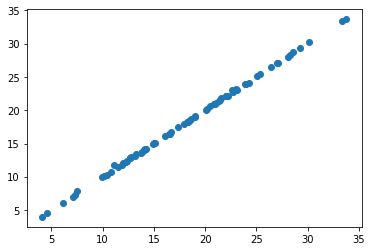

In [39]:
plt.scatter(y_test , y_predict_aic)

In [40]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_predict_aic))

MSE: 0.015962839168036366


In [358]:
#vif
x_vif = X_train[['siri', 'density', 'thigh', 'knee', 'wrist', 'biceps', 'forearm', 'hip']]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_aic = pd.DataFrame()
vif_aic["features"] = x_vif.columns
vif_aic["VIF Factor"] = [variance_inflation_factor(x_vif.values, i) for i in range(x_vif.shape[1])]
vif_aic.round(1)

,features,VIF Factor
0,siri,13.9
1,density,461.1
2,thigh,798.4
3,knee,903.4
4,wrist,957.4
5,biceps,393.7
6,forearm,555.4
7,hip,1517.4


In [498]:
model_aic = sm.OLS(y_train, sm.add_constant(X_train[['siri', 'density', 'thigh', 'knee', 'wrist', 'biceps', 'forearm', 'hip']]))
results_aic = model_aic.fit()

##### Monte Carlo Cross-Validation algorithm

In [160]:
X_Aic = X[['siri', 'density', 'thigh', 'knee', 'wrist', 'biceps', 'forearm', 'hip']] 
def MonteCarlo_aic(data, y):
    mse = []
    rs = ShuffleSplit(n_splits = 100, test_size= .30, random_state=0)
    for train_index, test_index in rs.split(data):
        reg = LinearRegression().fit(data.iloc[train_index], y.iloc[train_index])
        y_predict = reg.predict(data.iloc[test_index])
        m = metrics.mean_squared_error(y.iloc[test_index], y_predict)
        mse.append(m)
    return mse

MonteCarlo_aic(X_Aic, y)
mean_mse_aic = np.asarray(MonteCarlo_aic(X_Aic, y)).mean()
mean_mse_aic
varRes_aic = sum([(xi - mean_mse_aic)**2 for xi in MonteCarlo_aic(X_Aic, y)]) / (np.asarray(MonteCarlo_aic(X_Aic, y)).size - 1)
varRes_aic
print("Mean of MSE: ", mean_mse_aic)
print("Variance of MSE: ", varRes_aic)

Mean of MSE:  0.039922522365705836
Variance of MSE:  0.0010167842742505922


#### (4) Ridge regression

In [524]:
###Selecting lambda
scaler=StandardScaler()
X_std=scaler.fit_transform(X_train)


###Fit Ridge regression through cross validation
regr_cv=RidgeCV(alphas=np.logspace(-6, 6, 13))
model_cv=regr_cv.fit(X_std,y_train)

print(model_cv.alpha_)

1e-06


In [439]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1e-06, normalize = True)
ridge.fit(X_train_scale, y_train)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [440]:
y_predict_ridge = ridge.predict(X_test_scale)

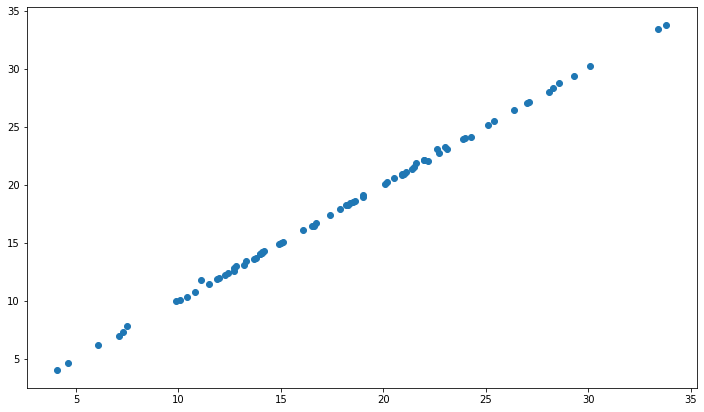

In [441]:
plt.scatter(y_test , y_predict_ridge)

In [442]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_predict_ridge))

MSE: 0.0172047159550953


In [443]:
def MonteCarlo_Rid(data, y):
    mse = []
    rs = ShuffleSplit(n_splits = 100, test_size= .30, random_state=0)
    for train_index, test_index in rs.split(data):
        ridge = Ridge(alpha=1e-06, normalize=True).fit(data.iloc[train_index], y.iloc[train_index])
        y_predict = ridge.predict(data.iloc[test_index])
        m = metrics.mean_squared_error(y.iloc[test_index], y_predict)
        mse.append(m)
    return mse

MonteCarlo_Rid(X_scale, y)
mean_mse_rid = np.asarray(MonteCarlo_Rid(X_scale, y)).mean()
mean_mse_rid
varRes_rid = sum([(xi - mean_mse_rid)**2 for xi in MonteCarlo_Rid(X_scale, y)]) / (np.asarray(MonteCarlo_Rid(X_scale, y)).size - 1)
varRes_rid
print("Mean of MSE: ", mean_mse_rid)
print("Variance of MSE: ", varRes_rid)

Mean of MSE:  0.057021516899364404
Variance of MSE:  0.0023805604495063934


#### (5) LASSO

In [444]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
mean_squared_error(y_test, lasso.predict(X_test))

0.016919591361378994

In [450]:
lassocv.alpha_

0.0010700285112606837

In [451]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.0010700285112606837)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0010700285112606837, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [452]:
y_predict_lasso = lasso.predict(X_test)

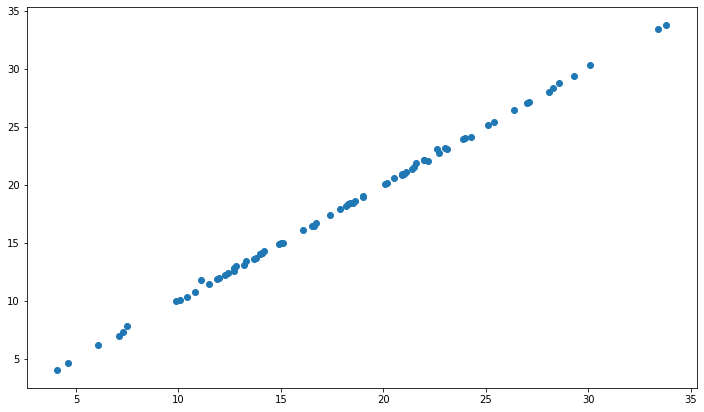

In [453]:
plt.scatter(y_test , y_predict_lasso)

In [454]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_predict_lasso))

MSE: 0.016919591361378994


In [457]:
def MonteCarlo_las(data, y):
    mse = []
    rs = ShuffleSplit(n_splits = 100, test_size= .30, random_state=0)
    for train_index, test_index in rs.split(data):
        las = linear_model.Lasso(alpha=0.0010700285112606837).fit(data.iloc[train_index], y.iloc[train_index])
        y_predict = las.predict(data.iloc[test_index])
        m = metrics.mean_squared_error(y.iloc[test_index], y_predict)
        mse.append(m)
    return mse

MonteCarlo_las(X, y)
mean_mse_las = np.asarray(MonteCarlo_las(X, y)).mean()
mean_mse_las
varRes_las = sum([(xi - mean_mse_las)**2 for xi in MonteCarlo_las(X, y)]) / (np.asarray(MonteCarlo_las(X, y)).size - 1)
varRes_las
print("Mean of MSE: ", mean_mse_las)
print("Variance of MSE: ", varRes_las)

Mean of MSE:  0.04268461684540084
Variance of MSE:  0.0008978245726806492


#### (6) Principal component regression

In [69]:
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

Text(0, 0.5, 'Variance expained')

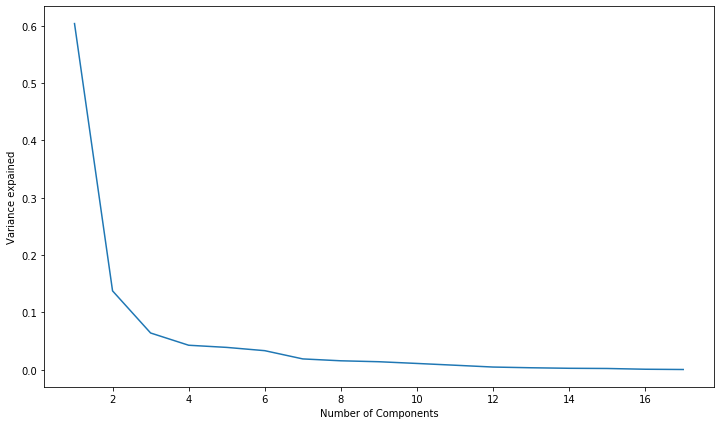

In [468]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

a = pca.explained_variance_
np.round(a, 2)
b = pca.explained_variance_ratio_
np.round(b, 2)

list_num = [i + 1 for i in range(pca.explained_variance_ratio_.size)]
plt.plot(list_num, pca.explained_variance_ratio_)
plt.xlabel("Number of Components")
plt.ylabel("Variance expained")

In [469]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train_scale = sc.fit_transform(X_train) 
X_test_scale = sc.transform(X_test)

In [518]:
pca_2_com = PCA(n_components=4)
X_train_pc = pca_2_com.fit_transform(X_train_scale) 
X_test_pc = pca_2_com.transform(X_test_scale) 

In [519]:
# Train regression model on training data 
reg_PCA = LinearRegression()
reg_PCA.fit(X_train_pc, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

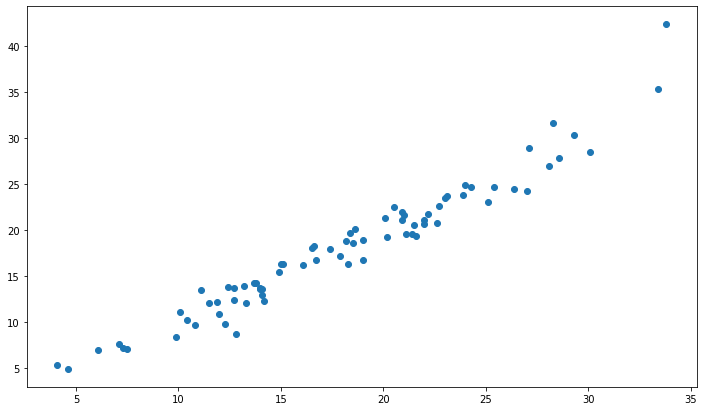

In [520]:
pred_PCA = reg_PCA.predict(X_test_pc)
plt.scatter(y_test , pred_PCA)

In [521]:
print('MSE:', metrics.mean_squared_error(y_test, pred_PCA))

MSE: 2.8310999699978554


In [522]:
def MonteCarlo_pca(data, y):
    mse = []
    rs = ShuffleSplit(n_splits = 100, test_size= .30, random_state=0)
    for train_index, test_index in rs.split(data):
        pca_fit = LinearRegression().fit(data.iloc[train_index], y.iloc[train_index])
        y_predict = pca_fit.predict(data.iloc[test_index])
        m = metrics.mean_squared_error(y.iloc[test_index], y_predict)

        mse.append(m)
    return mse

X_pca = PCA(n_components=4).fit_transform(scale(X))
X_pca = pd.DataFrame(X_pca)
MonteCarlo_pca(X_pca, y)
mean_mse_pca = np.asarray(MonteCarlo_pca(X_pca, y)).mean()
mean_mse_pca
varRes_pca = sum([(xi - mean_mse_pca)**2 for xi in MonteCarlo_pca(X_pca, y)]) / (np.asarray(MonteCarlo_pca(X_pca, y)).size - 1)
varRes_pca
print("Mean of MSE: ", mean_mse_pca)
print("Variance of MSE: ", varRes_pca)

Mean of MSE:  2.1887839241703357
Variance of MSE:  0.24347965453854756


#### (7) Partial least squares.

(-1, 17.8)

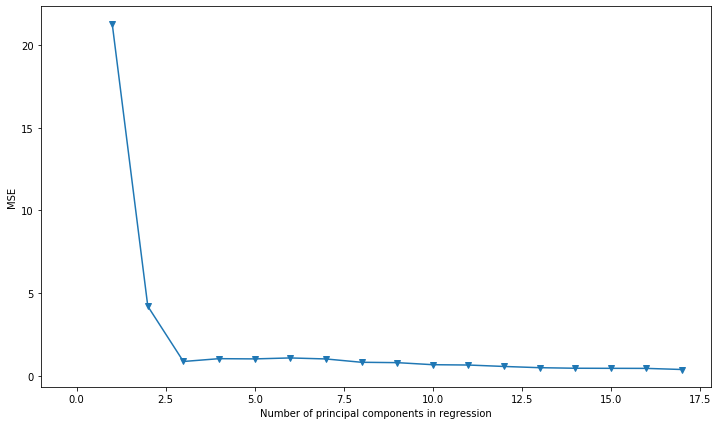

In [499]:
n = len(X_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

for i in np.arange(1, 18):
    pls = PLSRegression(n_components=i)
    score = model_selection.cross_val_score(pls, scale(X_train), y_train, cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(-score)

# Plot results
plt.plot(np.arange(1, 18), np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.xlim(xmin=-1)

In [513]:
pls = PLSRegression(n_components=3)
X_scale_train = pd.DataFrame(scale(X_train))
pls.fit(X_scale_train, y_train)

mean_squared_error(y_test, pls.predict(scale(X_test)))

3.4774298333638733

In [512]:
def MonteCarlo_pls(data, y):
    mse = []
    rs = ShuffleSplit(n_splits = 100, test_size= .30, random_state=0)
    for train_index, test_index in rs.split(data):
        pls_fit = PLSRegression(n_components=3).fit(data.iloc[train_index], y.iloc[train_index])
        y_predict = pls_fit.predict(data.iloc[test_index])
        m = metrics.mean_squared_error(y.iloc[test_index], y_predict)
        mse.append(m)
    return mse

X_scale = pd.DataFrame(scale(X))
MonteCarlo_pls(X_scale, y)
mean_mse_pls = np.asarray(MonteCarlo_pls(X_scale, y)).mean()
mean_mse_pls
varRes_pls = sum([(xi - mean_mse_pls)**2 for xi in MonteCarlo_pls(X_scale, y)]) / ((np.asarray(MonteCarlo_pls(X_scale, y))).size - 1)
varRes_pls
print("Mean of MSE: ", mean_mse_pls)
print("Variance of MSE: ", varRes_pls)

Mean of MSE:  0.7628300775659542
Variance of MSE:  0.1200100865178218
